# IRIS Flower Classification

**Project by: Mayur Rajput**

### Project Goal:

The Goal of this project is to build a machine learning model that can accurately classify species of the Iris flowers.

### Project Description :

The "IRIS Flower Classification" project aims to utilize machine learning techniques and Python programming to build a model capable of accurately classifying Iris flowers into their respective species. The Iris flower dataset, which comprises three species (setosa, versicolor, and virginica), will serve as the foundation for this classification task. By analyzing the sepal and petal measurements of these flowers, the project will develop a robust classification model.

#### Here’s a step-by-step breakdown of what we’ll do :

**Data Collection:** Obtain the Iris dataset from kaggle. Ensure the dataset includes measurements of sepal and petal features for three Iris species.

**Data Preprocessing:** Check for missing values in the dataset and decide on the appropriate handling method (imputation, removal, etc.).If any attributes are categorical (though unlikely in the Iris dataset), encode them into numerical values.

**Feature Engineering:** Given the simplicity of the Iris dataset, feature engineering may not be extensive. Consider standardizing or scaling the features to ensure uniform influence in the model.

**Data Visualization:** Visualize the data, including scatter plots or histograms, to gain insights into how features relate to species classification. Explore any patterns or correlations in the data.

**Model Selection:** Select a classification algorithm suitable for the task, such as logistic regression, decision trees, or support vector machines.

**Model Training:** Split the dataset into training and testing subsets for model evaluation. Train the chosen model using the training data.

**Model Evaluation:** Evaluate the model's performance using classification metrics like accuracy, precision, recall, and F1-score. Choose the model that offers the most accurate Iris flower classification.


## 1 - Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2 - Importing Dataset

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
border: 1px solid black !important;
}
</style>

## 3 - Data Exploration

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**3.1 - Identifying Missing Values in Dataset**

In [8]:
data.isnull().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

**3.2 - Removing Duplicate Values from Dataset**

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(147, 5)

In [11]:
#Removing substring "Iris-" from Species Column
data['species'] = data['species'].str.replace('Iris-','', regex = True)

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 4 - Data Visualization

**Sepal Length & Petal Length by Species**

In [13]:
sns.set_theme()

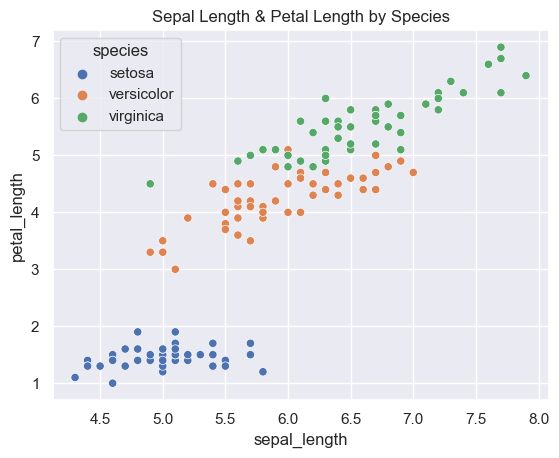

In [14]:
sns.scatterplot(x='sepal_length', y ='petal_length', hue='species', data=data)
plt.title('Sepal Length & Petal Length by Species')
plt.show()

**Sepal Width & Petal Width by Species**

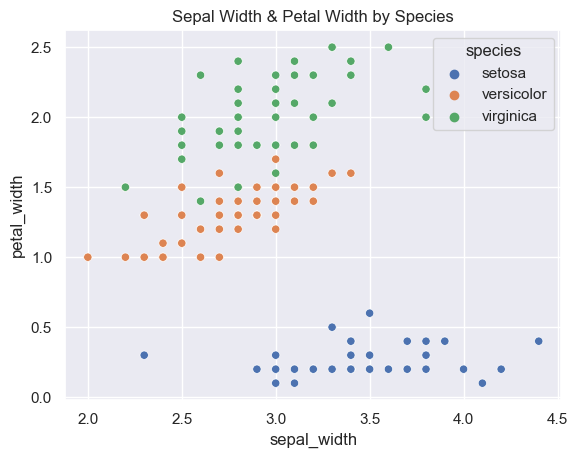

In [15]:
sns.scatterplot(x= 'sepal_width', y= 'petal_width', hue = 'species', data=data)
plt.title('Sepal Width & Petal Width by Species')
plt.show()

**Species Distribution**

<AxesSubplot:xlabel='species', ylabel='count'>

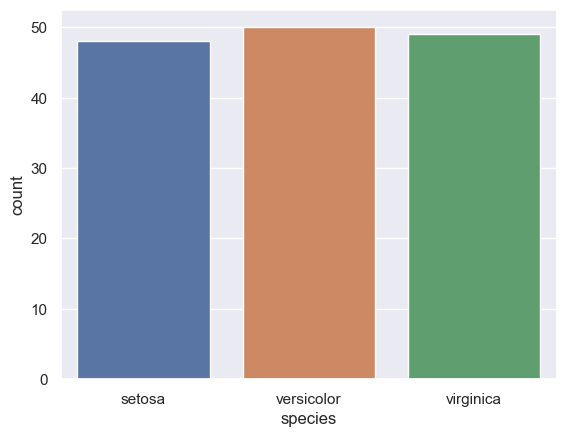

In [16]:
sns.countplot(x='species',data=data)

In [17]:
print(data['species'].value_counts())

versicolor    50
virginica     49
setosa        48
Name: species, dtype: int64


**Correlation matrix**

In [18]:
correlation = data.corr()

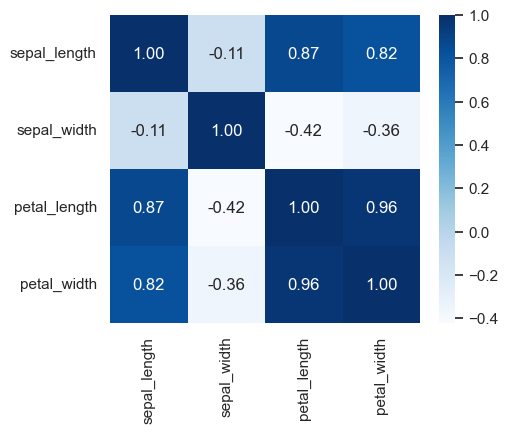

In [19]:
plt.figure(figsize=(5,4))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.show()

## 5 - Data Preprocessing

**5.1 - Label Encoding**

In [20]:
label = LabelEncoder()

In [21]:
data['species'] = label.fit_transform(data['species'])

In [22]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


0 -> Setosa 

1 -> Versicolor

2 -> Virginica

**5.2 - Separating feature variables and target variable**

In [24]:
x = data.drop(columns=['species'], axis = 1)
y = data['species']
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns]


In [25]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32


**5.4 - Spliting data into Training & Testing data**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(147, 4) (117, 4) (30, 4)


## 6 - Model Building & Training

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

## 7 - Model Evaluation

In [30]:
# Accuracy of training data
x_train_prediction = model.predict(x_train)

accuracy_train = accuracy_score(x_train_prediction, y_train)
print("Accuracy Score of training data:",accuracy_train)

Accuracy Score of training data: 0.9743589743589743


In [31]:
# Accuracy of test data
x_test_prediction = model.predict(x_test)

accuracy_test = accuracy_score(x_test_prediction, y_test)
print("Accuracy Score of test data:",accuracy_test)

Accuracy Score of test data: 1.0


## 8 - Model Deployment

In [32]:
# Create an empty list to store user input
input_data = []

# Define the list of features (replace with your actual feature names)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop through each feature to get user input
for feature in features:
    while True:
        try:
            value = float(input(f"Enter {feature}: "))
            input_data.append(value)
            break  # Exit the loop if input is valid
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Convert the list to a NumPy array
input_data_as_np_array = np.array(input_data)

# Now, user_input_as_np_array contains the input data as a NumPy array
print("User input:")
print(input_data_as_np_array)

Enter sepal_length: 5.1
Enter sepal_width: 3.5
Enter petal_length: 1.4
Enter petal_width: 0.2
User input:
[5.1 3.5 1.4 0.2]


In [34]:
# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)

# Make a prediction using the model
prediction = model.predict(input_data_reshaped)
print(prediction)

# Map the predicted label to the actual species name
if (prediction[0] == 0):
    print('Setosa')
elif (prediction[0] == 1):
    print('Versicolor')
else:
    print('virginica')

[0]
Setosa


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
